
## Abtastrate


Die Abtastrate ist 100Hz

Geshätzte Grundfrequenz : 1-2Hz

In [ ]:
import numpy as np
print('Omega: %.2f - %.2f '% (np.pi*2*1,np.pi*2*2 ))

## Dimension

fn(t) hat die Dimension nx3
1.Spalte: a_0
2.Spalte: a_n
3.Spalte: b_n

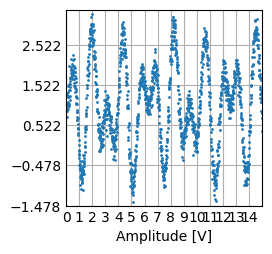

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

#---------------------------------------Data importieren--------------------------------
data = np.genfromtxt("data.txt")
# plot


#---------------------------------------Achsen separieren--------------------------------
x=data[:,0]
y=data[:,1]

#--------------------------------------Plot---------------------------------------------
fig, ax = plt.subplots()
ax.scatter(x,y,s=1)
ax.set(xlim=(0,np.amax(x)), xticks=np.arange(0, np.amax(x)),
       ylim=(np.amin(y)-0.1, np.amax(y)+0.1), yticks=np.arange(np.amin(y)-0.1, np.amax(y)+0.1))
ax.set_xlabel("time [s]")
ax.set_xlabel("Amplitude [V]")

plt.show()



### Fit mit FFT

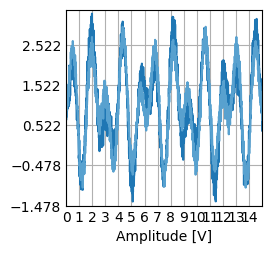

In [1]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.


"""---------Es gibt noch einen fehler bei aufgabe 3 aus ich versuche einen egenen Algorythmuss aus"""
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
plt.style.use('_mpl-gallery')

#---------------------------------------Data importieren--------------------------------
data = np.genfromtxt("data.txt")
# plot


#---------------------------------------Achsen separieren--------------------------------
x=data[:,0]
y=data[:,1]
#--------------------------------------Abtastrate---------------------------------------------
Ts=np.amax(x)/(len(x)-1)
#--------------------------------------System---------------------------------------------
time = np.linspace(0,np.amax(x),len(x))
spect_raw = np.fft.fft(y)
spect_raw = spect_raw/len(spect_raw)
freq = np.fft.fftfreq(time.size,d=0.01)

fit = np.array(np.zeros(len(time)))
for n in range(len(spect_raw)):
       for t in range(len(x)):
              fit[t] = fit[t] +spect_raw.real[n]*np.cos(freq[n]*2*np.pi*x[t])+np.imag(spect_raw.imag[n])*np.sin(freq[n]*2*np.pi*x[t])
#--------------------------------------Plot---------------------------------------------
fig, ax = plt.subplots()
ax.plot(x,y,x,fit)
ax.set(xlim=(0,np.amax(x)), xticks=np.arange(0, np.amax(x)),
       ylim=(np.amin(y)-0.1, np.amax(y)+0.1), yticks=np.arange(np.amin(y)-0.1, np.amax(y)+0.1))
ax.set_xlabel("time [s]")
ax.set_xlabel("Amplitude [V]")

plt.show()